Facial Keypoint Detection

Based on paper [Facial Key Points Detection using Deep Convolutional Neural Network](https://arxiv.org/pdf/1710.00977.pdf)

Goals:

1) To train a Neural Network to identify facial landmarks from an image of a face
2) Create a pipline to use Haar Cascades to locate faces in an arbitrary image so facial landmarks can be found and plotted
3) Implememt this pipleline in a web app so that facial keypoints may be detected from a live webcam feed 

Exploritory Data Analysis

the dataset that will be used to train the network has been extracted from the [YouTube Faces Dataset](https://www.cs.tau.ac.il/~wolf/ytfaces/) and has been processed to identify 68 unique facial keypoints on each image.

Below I visualize some of the training set.

In [ ]:
# !bash get_dataset.sh

In [3]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

In [8]:
key_pts_frame = pd.read_csv('data/training_frames_keypoints.csv')

n = 0
image_name = key_pts_frame.iloc[n, 0]
key_pts = key_pts_frame.iloc[n, 1:].to_numpy()
key_pts = key_pts.astype('float').reshape(-1, 2)

# print out some stats about the data
print('Number of images: ', key_pts_frame.shape[0])
print('Image name: ', image_name)
print('Landmarks shape: ', key_pts.shape)
print('First 4 key pts: {}'.format(key_pts[:4]))

Number of images:  3462
Image name:  Luis_Fonsi_21.jpg
Landmarks shape:  (68, 2)
First 4 key pts: [[ 45.  98.]
 [ 47. 106.]
 [ 49. 110.]
 [ 53. 119.]]


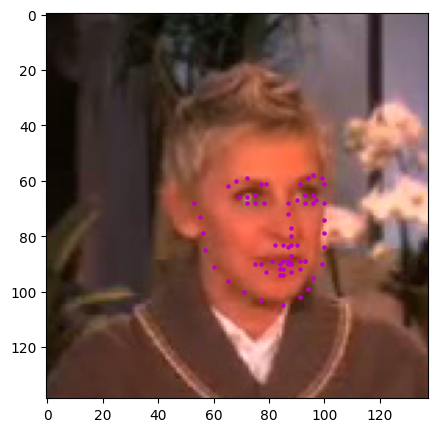

In [14]:
def show_keypoints(image, key_pts):
    """Show image with keypoints"""
    plt.imshow(image)
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')

# Display a few different types of images by changing the index n

# select an image by index in our data frame
n = 300
image_name = key_pts_frame.iloc[n, 0]
key_pts = key_pts_frame.iloc[n, 1:].to_numpy()
key_pts = key_pts.astype('float').reshape(-1, 2)

plt.figure(figsize=(5, 5))
show_keypoints(mpimg.imread(os.path.join('data/training/', image_name)), key_pts)
plt.show()